In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as py
import numpy as np

In [3]:
# Read in raw data
df = pd.read_csv("Data/ultra_super_clean_now.csv")

In [4]:
# Check for null values
df.isna().sum()
df_clean = df.dropna()

In [5]:
# Create function to bucket any status that is not "Passed" into a "Presented" value in order to determine ratio of bills passed

def map_values(value):
    if value == 'Passed':
        return 'Passed'
    else:
        return 'Presented'

# Apply the custom function to create column 'Status_Buckets'
df_clean['Status_Buckets'] = df['status_desc'].apply(map_values)

# Split out date into Year and Month columns
df_clean["Year"] = pd.DatetimeIndex(df_clean['status_date']).year
df_clean["Month"] = pd.DatetimeIndex(df_clean["status_date"]).month

/var/folders/dv/0_l1gdhd329bg0tcvbpr461m0000gn/T/ipykernel_22475/3077083410.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Status_Buckets'] = df['status_desc'].apply(map_values)


In [6]:
# Check data to make sure function worked as intended
df_clean.head(100)

,Unnamed: 0,bill_id,session_id,bill_number,status,status_desc,status_date,last_action_date,State,document_id,document_size,document_desc,Status_Buckets
0,0,878191,1228,HB1001,4,Passed,2016-05-23,2016-05-23,AR,1407813.0,158869.0,Draft,Passed
1,1,878191,1228,HB1001,4,Passed,2016-05-23,2016-05-23,AR,1411411.0,115092.0,Chaptered,Passed
2,2,878268,1228,HB1002,4,Passed,2016-05-23,2016-05-23,AR,1408125.0,210390.0,Draft,Passed
3,3,878268,1228,HB1002,4,Passed,2016-05-23,2016-05-23,AR,1411407.0,166810.0,Chaptered,Passed
4,4,878297,1228,HB1003,4,Passed,2016-05-23,2016-05-23,AR,1408149.0,159200.0,Draft,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1585798,1952,HB05023,1,Introduced,2022-02-09,2022-02-09,CT,2509011.0,43382.0,Introduced,Presented
96,96,1585754,1952,HB05024,1,Introduced,2022-02-09,2022-02-09,CT,2508966.0,41223.0,Introduced,Presented
97,97,1585791,1952,HB05025,1,Introduced,2022-02-09,2022-02-09,CT,2509004.0,42241.0,Introduced,Presented
98,98,1585789,1952,HB05026,1,Introduced,2022-02-09,2022-02-09,CT,2509002.0,41139.0,Introduced,Presented


In [7]:
# Drop duplicates to pull in unique counts of legislation
df_unique = df.drop_duplicates(subset="bill_id")

In [ ]:
# Create dataframe to store States and their bill count values, and then 
state_bill_counts = df_clean.groupby(["State"])["bill_id"].nunique().reset_index(name="BillCount")
state_bill_counts.sort_values("BillCount", ascending=False, inplace=True)
state_bill_counts.reset_index(inplace=True)

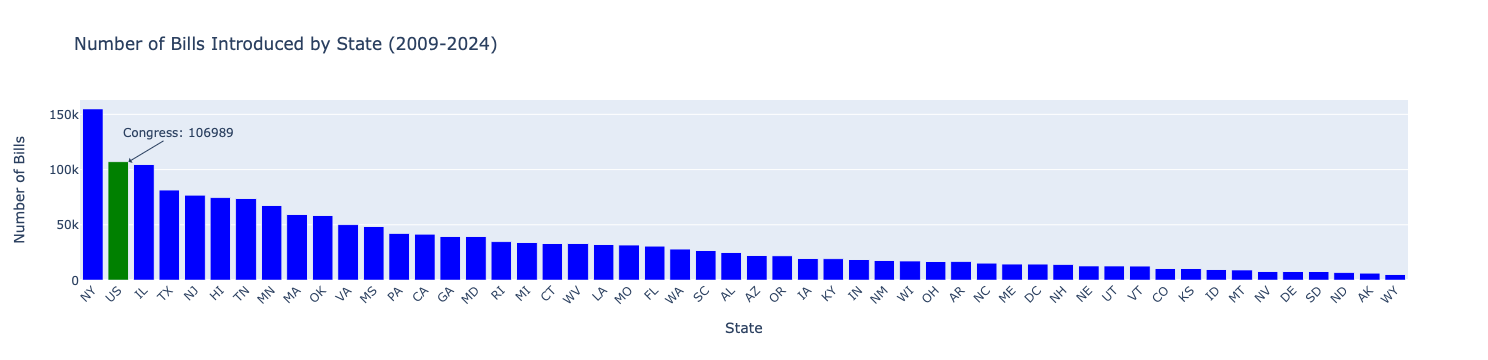

In [78]:
# Objects to hold highlight information for Congress
state_to_highlight = 'US'
highlight_color = 'green'

# Add annotation for the highlighted state
highlighted_index = state_bill_counts[state_bill_counts["State"] == state_to_highlight].index[0]
highlighted_billcount = state_bill_counts.loc[highlighted_index, "BillCount"]

# Create bar chart to show total number of unique bills by state
fig = px.bar(state_bill_counts, x="State", y="BillCount", title="Number of Bills Introduced by State (2009-2024)", labels = {"BillCount": "Number of Bills"})
fig.update_traces(marker_color=[highlight_color if x == state_to_highlight else "blue" for x in state_bill_counts["State"]])

# Call out the Congress bar in the bar chart
fig.add_annotation(
    x=highlighted_index+0.4,
    y=highlighted_billcount,
    text=f'Congress: {highlighted_billcount}',
    showarrow=True,
    arrowhead=1,
    ax=50,
    ay=-30
)
# Adjust angle of labels on x-axis 
fig.update_xaxes(tickangle=-45)
fig.show()


In [ ]:
fig = px.bar(df_unique["State"].value_counts(), title="Number of Bills Introduced by State (2010-2023)")
fig.show()

In [53]:
# Create data frame with grouping by Status Bucket
bill_state_counts_df = df_clean.groupby(["State","Status_Buckets"])["bill_id"].nunique().reset_index(name="BillCount")

In [54]:
bill_state_counts_df

,State,Status_Buckets,BillCount
0,AK,Passed,1287
1,AK,Presented,4875
2,AL,Passed,11173
3,AL,Presented,13824
4,AR,Passed,10078
...,...,...,...
99,WI,Presented,14581
100,WV,Passed,5799
101,WV,Presented,27398
102,WY,Passed,2095


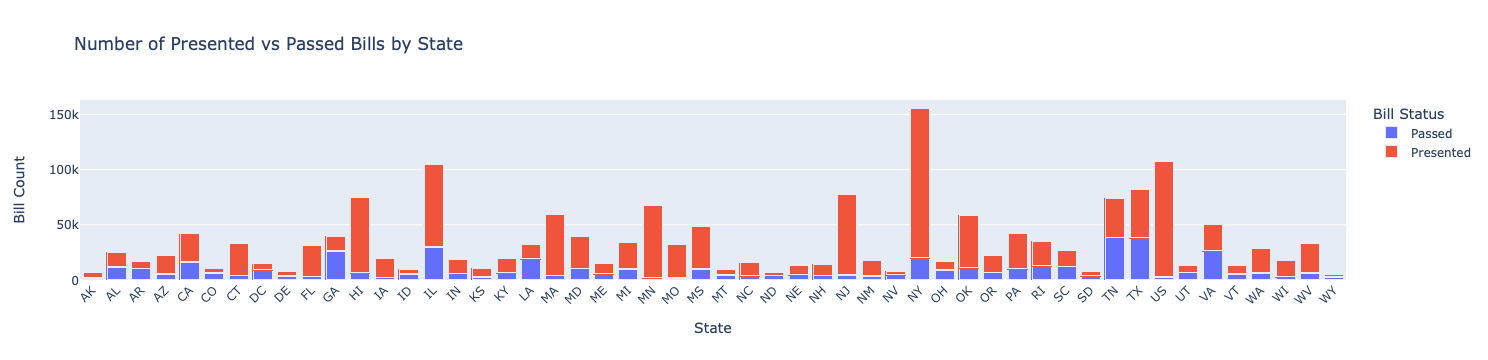

In [68]:
# Create stacked bar chart to visualize bills pasesed by state
fig = px.bar(bill_state_counts_df, x="State", y="BillCount", color="Status_Buckets", barmode="stack",
            title="Number of Presented vs Passed Bills by State", 
            labels = {"State": "State", "BillCount": "Bill Count", "Status_Buckets": "Bill Status"})
fig.update_xaxes(tickangle=-45)
fig.show()

In [58]:
# Create a data frame to show number of unique bills passed and presented by year
bill_count_year_df = df_clean.groupby(["Year","Status_Buckets"])["bill_id"].nunique().reset_index(name="BillCount")
bill_count_year_df.head()

,Year,Status_Buckets,BillCount
0,1969,Presented,183
1,2007,Passed,2
2,2007,Presented,1
3,2008,Passed,5
4,2008,Presented,176


In [69]:
# Drop data from years prior to 2008, since there isn't much data from those years, and drop 2024, since that's not a full year and acts as a bit of an outlier
bill_count_year_df.drop(bill_count_year_df[bill_count_year_df["Year"] <= 2008].index,inplace=True)
bill_count_year_df.drop(bill_count_year_df[bill_count_year_df["Year"] == 2024].index,inplace=True)

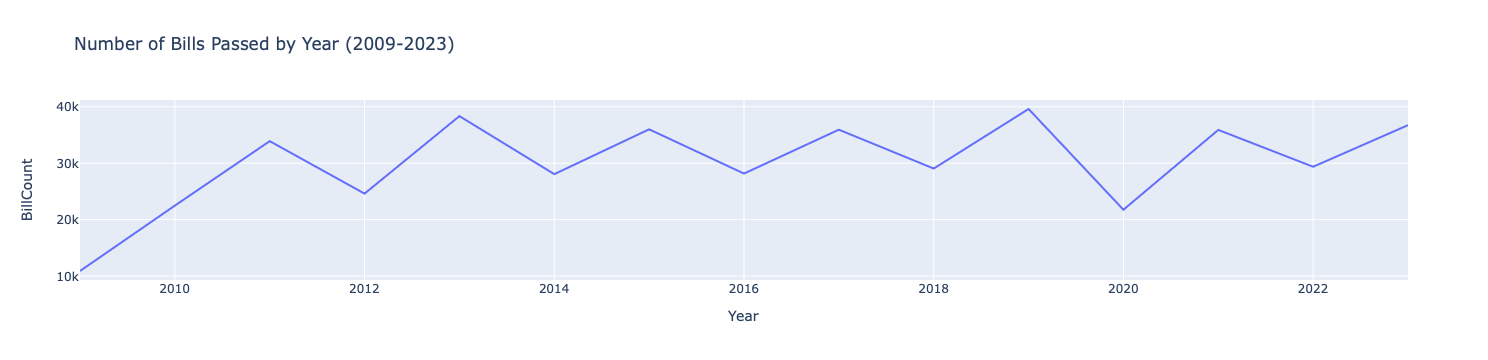

In [70]:
# Create line chart to show trend of passed bills by year
fig = px.line(bill_count_year_df[bill_count_year_df["Status_Buckets"] == "Passed"], x="Year", y="BillCount",
             title = "Number of Bills Passed by Year (2009-2023)")

fig.show()

In [72]:
# Create pivoted data frame to easily calculate a pass rate
bill_count_pivot_df = bill_count_year_df.pivot(index="Year", columns='Status_Buckets', values = 'BillCount')

In [74]:
# Add pass rate column
bill_count_pivot_df["PassRate"] = np.round(bill_count_pivot_df["Passed"]/(bill_count_pivot_df["Passed"]+bill_count_pivot_df["Presented"]), decimals=2)
bill_count_pivot_df.head()

Status_Buckets,Passed,Presented,PassRate
Year,,,
2009,10883,53280,0.17
2010,22478,53248,0.30
2011,33909,93881,0.27
2012,24604,58018,0.30
2013,38347,98109,0.28


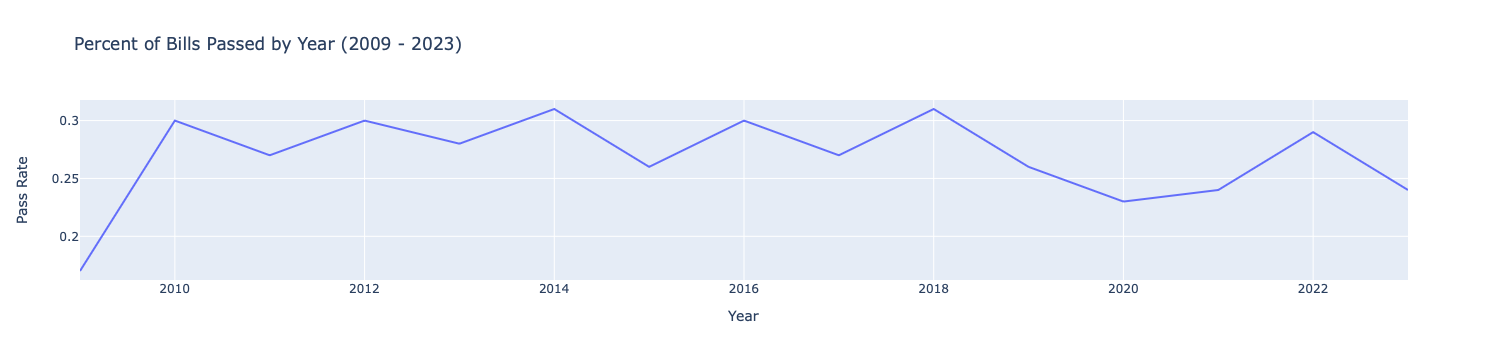

In [75]:
# Create line chart showing bill pass rate by year
fig = px.line(bill_count_pivot_df, x=bill_count_pivot_df.index, y="PassRate",
             title = "Percent of Bills Passed by Year (2009 - 2023)", labels = {"PassRate": "Pass Rate"})

fig.show()

In [64]:
# Create pivoted data frame based on states
state_ratios = df_clean.groupby(["State","Status_Buckets"])["bill_id"].nunique().reset_index(name="BillCount")
state_ratios_pivot_df = state_ratios.pivot(index="State", columns="Status_Buckets", values="BillCount")

In [65]:
state_ratios_pivot_df["PassRate"] = np.round(state_ratios_pivot_df["Passed"]/(state_ratios_pivot_df["Presented"]+state_ratios_pivot_df["Passed"]), decimals=2)
state_ratios_pivot_df.head()

Status_Buckets,Passed,Presented,PassRate
State,,,
AK,1287,4875,0.21
AL,11173,13824,0.45
AR,10078,6431,0.61
AZ,4919,17175,0.22
CA,15661,25775,0.38


In [66]:
state_ratios_pivot_df["PassRatePct"] = state_ratios_pivot_df["PassRate"].map('{:.2%}'.format)
state_ratios_pivot_df.head()

Status_Buckets,Passed,Presented,PassRate,PassRatePct
State,,,,
AK,1287,4875,0.21,21.00%
AL,11173,13824,0.45,45.00%
AR,10078,6431,0.61,61.00%
AZ,4919,17175,0.22,22.00%
CA,15661,25775,0.38,38.00%


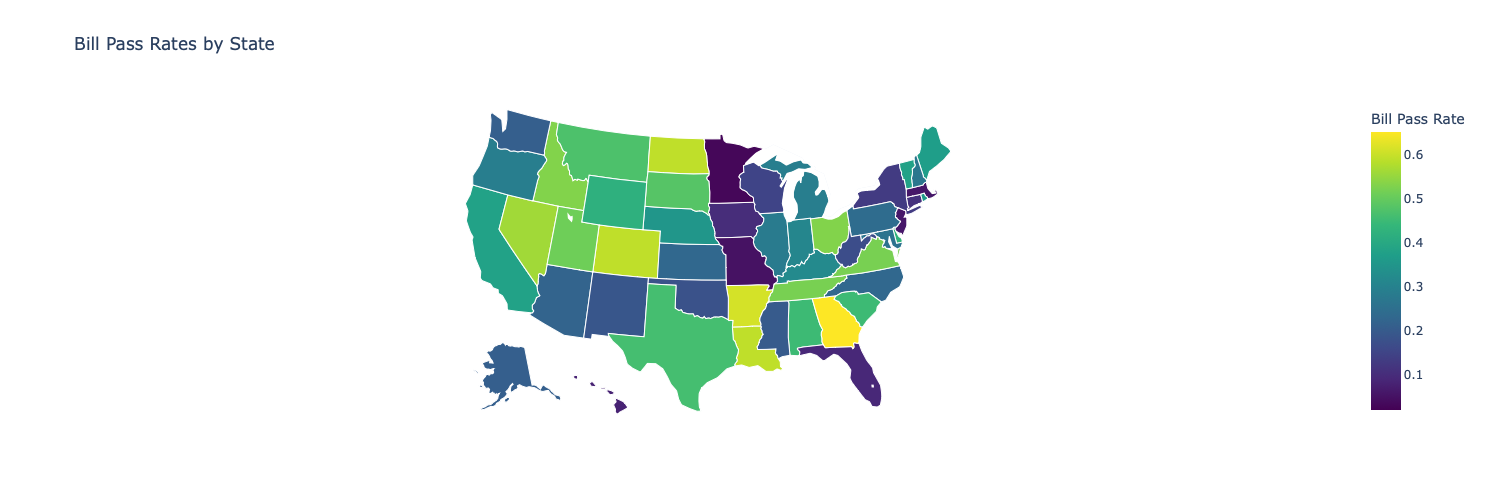

In [76]:
fig = go.Figure(data=go.Choropleth(
    locations=state_ratios_pivot_df.index,
    z=state_ratios_pivot_df['PassRate'],
    locationmode='USA-states',
    colorscale='Viridis',
    autocolorscale=False,
    text='Bill Pass Rate = ' + state_ratios_pivot_df["PassRatePct"].astype(str), 
    marker_line_color='white', 
    colorbar_title="Bill Pass Rate"
))

fig.update_layout(
    title_text='Bill Pass Rates by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
    autosize=False,
    width=1000,
    height=500
)

fig.show()


